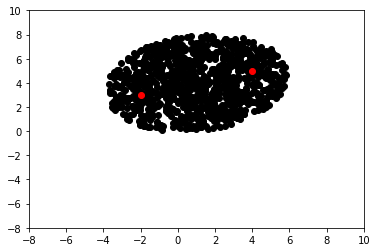

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
F1 = [-2.0, 3.0]
F2 = [4.0, 5.0]
class AreaBounds:
    def __init__(self, area):
        self.xmin = float(area[0])
        self.xmax = float(area[1])
        self.ymin = float(area[2])
        self.ymax = float(area[3])
play_area = AreaBounds([-8, 10, -8, 10])       
def sample_ellipse(F1, F2, c_best):
    while True:
        x, y = random.uniform(play_area.xmin, play_area.xmax),random.uniform(play_area.ymin, play_area.ymax)
        a1 = np.sqrt((x-F1[0])**2+(y-F1[1])**2)
        a2 = np.sqrt((x-F2[0])**2+(y-F2[1])**2)
        if a1+a2 < c_best:
            return x, y
for i in range(1000):
    x, y = sample_ellipse(F1, F2, 10.0)
    plt.scatter(x, y, color='k')
plt.scatter(-2.0, 3.0, color='red')
plt.scatter(4.0, 5.0, color='red')
plt.axis([-8, 10, -8, 10])
plt.show()
    

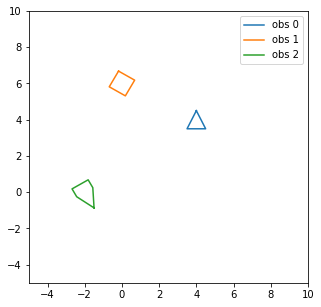

In [8]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
class Box2D:
    def __init__(self, x, y, yaw, corner_points=None, v=0.0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.corner_points = corner_points
        self.v = v

corner_points3 = [[0.5, -0.5, -0.5, 0.5],
                 [0.0, 0.5, -0.5, 0.0]]    
corner_points4 = [[0.5, -0.5, -0.5, 0.5, 0.5],
                 [0.5, 0.5, -0.5, -0.5, 0.5]]        
corner_points5 = [[1.0, 0.0, -0.5, -0.5, 0.0, 1.0],
                 [0.0, 0.5, 0.5, -0.5, -0.5, 0.0]]           
obs0 = Box2D(4.0, 4.0, math.pi/2.0, corner_points=corner_points3)
obs1 = Box2D(0.0, 6.0, math.pi/3.0, corner_points=corner_points4)
obs2 = Box2D(-2.0, 0.0, -math.pi/3.0, corner_points=corner_points5)
obs_buf = [obs0, obs1, obs2]
def local2global(x0, y0, yaw0, corner_points):
    R = np.array([[math.cos(yaw0), -math.sin(yaw0)],
                  [math.sin(yaw0), math.cos(yaw0)]])
    corner_arr = np.array(corner_points)
    return np.dot(R, corner_arr)+np.array([[x0],[y0]])
for i, obs in enumerate(obs_buf):
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    plt.plot(gcp[0], gcp[1], label="obs "+str(i))
    plt.axis([-5, 10, -5, 10])
plt.legend(loc="upper right")

plt.show()


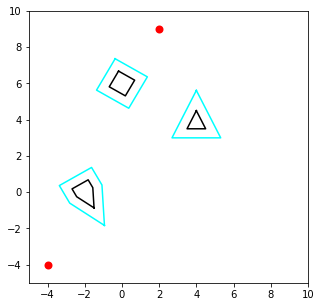

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

def inflation_obs(obs, r):
    A = []
    inflat_cps = []
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    for i in range(len(gcp[0])-1):
        v1 = [gcp[0, i], gcp[1, i]]
        v2 = [gcp[0, i+1], gcp[1, i+1]]
        a = v2[0]-v1[0]
        b = v1[1]-v2[1]
        c = v1[1]*a+v1[0]*b
        inflat_c = -r*math.sqrt(a*a+b*b)+c
        A.append([a, b, inflat_c])
    pre_ind = -1
    for i in range(len(A)):
        a1, b1, c1 = A[pre_ind][1], A[pre_ind][0], A[pre_ind][2]
        a2, b2, c2 = A[i][1], A[i][0], A[i][2]
        x = (b2*c1-b1*c2)/(a1*b2-a2*b1)
        y = (a1*c2-a2*c1)/(a1*b2-a2*b1)  
        inflat_cps.append([x, y])
        pre_ind = i
    inflat_cps.append(inflat_cps[0])    
    return A, inflat_cps


plt.figure(figsize=(5, 5))

inflat_cps_buf = []
A_buf = []
for obs in obs_buf:
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    plt.plot(gcp[0], gcp[1], 'k')
    A, inflat_cps = inflation_obs(obs, 0.5)
    inflat_cps_buf.append(inflat_cps)
    A_buf.append(A)
    plt.plot(np.array(inflat_cps)[:,0],np.array(inflat_cps)[:,1], 'cyan')
plt.scatter(-4.0, -4.0, color='red', linewidth=2)
plt.scatter(2.0, 9.0, color='red', linewidth=2)       
plt.axis([-5, 10, -5, 10])
plt.show()   

Bx1_arr = []
By1_arr = []
Bx2_arr = []
By2_arr = []
for i in range(len(inflat_cps_buf)):
    inflat_cps = inflat_cps_buf[i]
    for j in range(len(inflat_cps)-1):
        Bx1_arr.append(inflat_cps[j][0])
        By1_arr.append(inflat_cps[j][1])
        Bx2_arr.append(inflat_cps[j+1][0])
        By2_arr.append(inflat_cps[j+1][1])
Bx1_arr = np.array(Bx1_arr)
By1_arr = np.array(By1_arr)
Bx2_arr = np.array(Bx2_arr)
By2_arr = np.array(By2_arr)

In [10]:
# time cost is 0.05774664878845215
def line_segment_cross_judge(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    if ((max(Ax1,Ax2)<=min(Bx1,Bx2) or min(Ax1,Ax2)>=max(Bx1,Bx2)) or
        (max(Ay1,Ay2)<=min(By1,By2) or min(Ay1,Ay2)>=max(By1,By2))):
        return False
    if (((Bx1-Ax1)*(Ay2-Ay1)-(By1-Ay1)*(Ax2-Ax1))*((Bx2-Ax1)*(Ay2-Ay1)-(By2-Ay1)*(Ax2-Ax1))<0 and
        ((Ax1-Bx1)*(By2-By1)-(Ay1-By1)*(Bx2-Bx1))*((Ax2-Bx1)*(By2-By1)-(Ay2-By1)*(Bx2-Bx1))<0):
        return True
    return False

def point_in_obs_judge(p, A):
    A_mat = np.array(A)
    x = np.array([p[1], p[0], -1]).T
    M = np.dot(A_mat, x)
    if np.min(M) > 0:
        return True
    return False


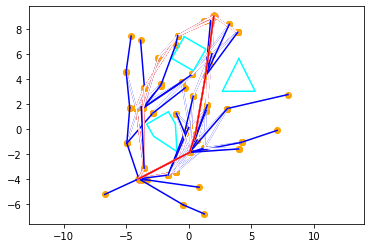

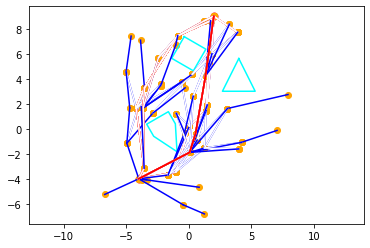

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
plt.figure(2)

for inflat_cps in inflat_cps_buf:
    plt.plot(np.array(inflat_cps)[:,0],np.array(inflat_cps)[:,1], 'cyan')
plt.scatter(-4.0, -4.0, color='red', linewidth=2)
plt.scatter(2.0, 9.0, color='red', linewidth=2)       
plt.axis([-8, 10, -8, 10])
plt.axis('equal')

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.cost = 0
        self.parent = -1
        
class AreaBounds:
    def __init__(self, area):
        self.xmin = float(area[0])
        self.xmax = float(area[1])
        self.ymin = float(area[2])
        self.ymax = float(area[3])

class InformedRRTStar(object):
    def __init__(self, start, goal, obs_buf, play_area, 
                 expand_dis=3.0, 
                 radius = 5.0,
                 goal_sample_rate=5, 
                 max_iter=50):
        self.start = Node(start[0], start[1])
        self.end = Node(goal[0], goal[1])
        self.final_idx = -1
        self.play_area = AreaBounds(play_area)
        self.expand_dis = expand_dis
        self.radius = radius
        self.goal_sample_rate = goal_sample_rate
        self.max_iter = max_iter
        
    def planning(self):
        self.node_list = [self.start]
        path = None
        i = 0
        while i < self.max_iter or self.final_idx < 0:
#         for i in range(self.max_iter):
            if self.final_idx < 0:
                rnd_node = self.get_random_node()
            else:
                rnd_node = self.sample_ellipse(self.node_list[self.final_idx].cost)
#             plt.scatter(rnd_node.x, rnd_node.y, color='gray')
            nearest_ind = self.get_nearest_node_index(rnd_node)
            
            new_node = self.steer(nearest_ind, rnd_node, self.expand_dis)
            nearnodeidx_list = self.getRnearnode(new_node)
            
            # 过程一
            nearest_idx = -1
            min_cost = 9999.0
            for nearnodeidx in nearnodeidx_list:
                if self.check_collision(self.node_list[nearnodeidx], new_node):
                    cost = self.calc_distance(self.node_list[nearnodeidx], new_node) + self.node_list[nearnodeidx].cost
                    if cost < min_cost:
                        nearest_idx = nearnodeidx
                        min_cost = cost
            if nearest_idx > -1:
                new_node.cost = min_cost
                new_node.parent = nearest_idx
                plt.plot([self.node_list[nearest_idx].x, new_node.x], 
                         [self.node_list[nearest_idx].y, new_node.y], 'b')
                plt.scatter([self.node_list[nearest_idx].x, new_node.x], 
                            [self.node_list[nearest_idx].y, new_node.y], color='orange')
                self.node_list.append(new_node)
            else:
                continue
                
            # 过程二

            for nearnodeidx in nearnodeidx_list:
                if self.check_collision(self.node_list[nearnodeidx], new_node):
                    tmp_cost = self.calc_distance(self.node_list[nearnodeidx], new_node) + new_node.cost
                    if tmp_cost < self.node_list[nearnodeidx].cost:
                        old_p_idx = self.node_list[nearnodeidx].parent
                        plt.plot([self.node_list[nearnodeidx].x, self.node_list[old_p_idx].x], 
                                 [self.node_list[nearnodeidx].y, self.node_list[old_p_idx].y], 'w')
                        plt.scatter([self.node_list[nearnodeidx].x, self.node_list[old_p_idx].x], 
                                    [self.node_list[nearnodeidx].y, self.node_list[old_p_idx].y], color='orange')                        
                        self.node_list[nearnodeidx].parent = len(self.node_list)-1
                        self.node_list[nearnodeidx].cost = tmp_cost
                        plt.plot([self.node_list[nearnodeidx].x, new_node.x], 
                                 [self.node_list[nearnodeidx].y, new_node.y], 'b')
                        plt.scatter([self.node_list[nearnodeidx].x, new_node.x], 
                                    [self.node_list[nearnodeidx].y, new_node.y], color='orange')                          
                        
                        
            
            if self.final_idx < 0:
                if self.calc_dist_to_goal(self.node_list[-1].x, self.node_list[-1].y) <= self.expand_dis:
                    final_node = self.steer(len(self.node_list)-1, self.end, self.expand_dis)
                    if self.check_collision(self.node_list[-1], final_node):
                        self.node_list.append(final_node)
                        self.final_idx = len(self.node_list)-1   
            else:
                if path != None: plt.plot(np.array(path)[:,0], np.array(path)[:,1], 'w') 
                path = self.generate_final_course() 
                plt.plot(np.array(path)[:,0], np.array(path)[:,1], 'r')                                

            if is_ipython:
                display.clear_output(wait=True)
                display.display(plt.gcf())
            i = i+1
                
        return path
                
                
    def getRnearnode(self, new_node):
        nearnodeidx_list = []
        for idx in range(len(self.node_list)):
            dx = new_node.x - self.node_list[idx].x
            dy = new_node.y - self.node_list[idx].y
            if math.sqrt(dx*dx+dy*dy) < self.radius:
                nearnodeidx_list.append(idx)
        return nearnodeidx_list
    
        
        
    def get_random_node(self):
        if random.randint(0, 100) > self.goal_sample_rate:
            rnd = Node(random.uniform(self.play_area.xmin, self.play_area.xmax),
                       random.uniform(self.play_area.ymin, self.play_area.ymax))
        else: rnd = Node(self.end.x, self.end.y)
        return rnd
    
    def sample_ellipse(self, c_best):
        while True:
            x, y = random.uniform(self.play_area.xmin, self.play_area.xmax),random.uniform(self.play_area.ymin, self.play_area.ymax)
            a1 = np.sqrt((x-self.start.x)**2+(y-self.start.y)**2)
            a2 = np.sqrt((x-self.end.x)**2+(y-self.end.y)**2)
            if a1+a2 < c_best:
                return Node(x, y)
    
    def get_nearest_node_index(self, rnd_node):
        dlist = [(node.x-rnd_node.x)**2+(node.y-rnd_node.y)**2 for node in self.node_list]
        return dlist.index(min(dlist))
        
    def steer(self, from_ind, to_node, extend_length=float("inf")):
        from_node = self.node_list[from_ind]
        d, theta = self.calc_distance_and_angle(from_node, to_node)        
        
        if extend_length > d:
            extend_length = d
        
        new_node = Node(from_node.x+extend_length * math.cos(theta),
                        from_node.y+extend_length * math.sin(theta))
        
        new_node.cost = self.calc_distance(self.node_list[from_ind], new_node) + self.node_list[from_ind].cost
        new_node.parent = from_ind
        return new_node
            
        
    def calc_distance(self, from_node, to_node):
        dx = to_node.x - from_node.x
        dy = to_node.y - from_node.y
        return math.hypot(dx, dy)
    
    def calc_distance_and_angle(self, from_node, to_node):
        dx = to_node.x - from_node.x
        dy = to_node.y - from_node.y
        d = math.hypot(dx, dy)
        theta = math.atan2(dy, dx)
        return d, theta    
    
    def calc_dist_to_goal(self, x, y):
        dx = x - self.end.x
        dy = y - self.end.y
        return math.hypot(dx, dy)    
    
    def check_collision(self, node0, new_node):
        if new_node is None: return False
        
        for A in A_buf:
            if point_in_obs_judge([new_node.x, new_node.y], A):
                return False
            
        Ax1, Ay1 = node0.x, node0.y
        Ax2, Ay2 = new_node.x, new_node.y                
        for k in range(len(Bx1_arr)):
            if line_segment_cross_judge(Ax1, Ay1, Ax2, Ay2, Bx1_arr[k], By1_arr[k], Bx2_arr[k], By2_arr[k]):   
                return False
        return True
    
    def generate_final_course(self):
        path = [[self.end.x, self.end.y]]
        node = self.node_list[self.final_idx]
        while node.parent >= 0:
            path.append([node.x, node.y])
            node = self.node_list[node.parent]
        path.append([node.x, node.y])
        return path
    
    
start_pos = [-4.0, -4.0]
goal_pos = [2.0, 9.0]    
play_area = [-8, 10, -8, 10]
rrt = InformedRRTStar(start_pos, goal_pos, obs_buf, play_area)
path = rrt.planning()
plt.plot(np.array(path)[:,0], np.array(path)[:,1], 'r')
plt.show()